In movie recommendation systems, there are several key approaches that are commonly used in machine learning. These approaches can be broadly categorized into collaborative filtering, content-based filtering, and hybrid models. Here’s an overview of each approach:

1. **Collaborative Filtering**

    Collaborative filtering relies on the idea that users who have agreed in the past will likely agree again in the future. This approach can be divided into two main types:

    **User-based collaborative filtering:** This method recommends movies to a user based on the preferences of other users who have similar tastes. The assumption is that users who liked the same movies in the past will like similar movies in the future.

    **Example:** If User A and User B both liked movies X and Y, and User A likes movie Z, then User B might also like movie Z.

    **Item-based collaborative filtering:** This technique looks at similarities between movies based on how users rate them. If a user liked a certain movie, the system recommends movies that are similar to the ones they liked.

    **Example:** If users who liked movie X also liked movie Y, and you liked movie X, you are likely to enjoy movie Y as well.

    Collaborative filtering can be further enhanced using matrix factorization techniques like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS) to reduce the dimensionality of the user-item matrix and improve scalability.

2. **Content-Based Filtering**

    This method recommends movies based on the features of the movies themselves and the user’s past preferences. The system creates a profile for each user based on the features of the movies they’ve liked or rated highly. Features can include genres, directors, actors, descriptions, or even keywords.

    **Example:** If a user likes movies that feature action and science fiction, the system will recommend other movies that are categorized as action or science fiction, or have similar attributes.

    Natural Language Processing (NLP) can be used in content-based systems to analyze movie descriptions, reviews, or even subtitles to extract meaningful features.

3. **Hybrid Models**

   Hybrid approaches combine collaborative filtering and content-based filtering to take advantage of both methods. These models provide more accurate recommendations by addressing the limitations of each individual approach.

   **Example:** A hybrid system might start with collaborative filtering to find similar users or items and then apply content-based filtering to refine the recommendations based on movie features or user preferences.

   Hybrid methods are often used in modern recommendation systems like Netflix and Amazon to improve both scalability and personalization.

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
import re
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
!pip install gensim

import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!unzip /content/drive/MyDrive/Anime_data.csv.zip

Archive:  /content/drive/MyDrive/Anime_data.csv.zip
  inflating: Anime_data.csv          


In [ ]:
df = pd.read_csv('/content/Anime_data.csv')
df.head()

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17002 entries, 0 to 17001
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anime_id    17002 non-null  int64  
 1   Title       17002 non-null  object 
 2   Genre       14990 non-null  object 
 3   Synopsis    15583 non-null  object 
 4   Type        16368 non-null  object 
 5   Producer    7635 non-null   object 
 6   Studio      7919 non-null   object 
 7   Rating      14425 non-null  float64
 8   ScoredBy    13227 non-null  float64
 9   Popularity  16368 non-null  float64
 10  Members     17002 non-null  float64
 11  Episodes    14085 non-null  float64
 12  Source      15075 non-null  object 
 13  Aired       16368 non-null  object 
 14  Link        16368 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


In [ ]:
df.shape

(17002, 15)

In [ ]:
df.isna().sum()

,0
Anime_id,0
Title,0
Genre,2012
Synopsis,1419
Type,634
Producer,9367
Studio,9083
Rating,2577
ScoredBy,3775
Popularity,634


**EDA**

In [ ]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# highly rated movies
highly_rated_movies = df.nlargest(10, 'Rating')[['Title', 'Rating']]
print("Highly Rated Movies:\n", highly_rated_movies)

# least rated movies
least_rated_movies = df.nsmallest(10, 'Rating')[['Title', 'Rating']]
print("\nLeast Rated Movies:\n", least_rated_movies)

Highly Rated Movies:
                                                    Title  Rating
11654               Kyouiku Eiga-sai Jushou Anime Series   10.00
11721  Kuunyan no Koutsuu Anzen: Tadashii Jitensha no...   10.00
11734                                        Ittekimasu.   10.00
12401  Manichi ga Tsurai Kimochi Wakarimasu ka: Yurus...   10.00
13031                                      Xiao Hua Xian   10.00
14510                                      Ling Feng Zhe   10.00
11598                                       Hashire John    9.50
11694           Tat-chan - Momo-chan no Fushigina Taiken    9.50
3634                    Fullmetal Alchemist: Brotherhood    9.25
8283                                   Okaachan Gomen ne    9.20

Least Rated Movies:
                                           Title  Rating
12402               Mimi-chan no Te to Te to Te     1.0
12428                          Gomen ne Chitchi     1.0
12429                   Mirai Shouboushi Kyuuta     1.0
12430            

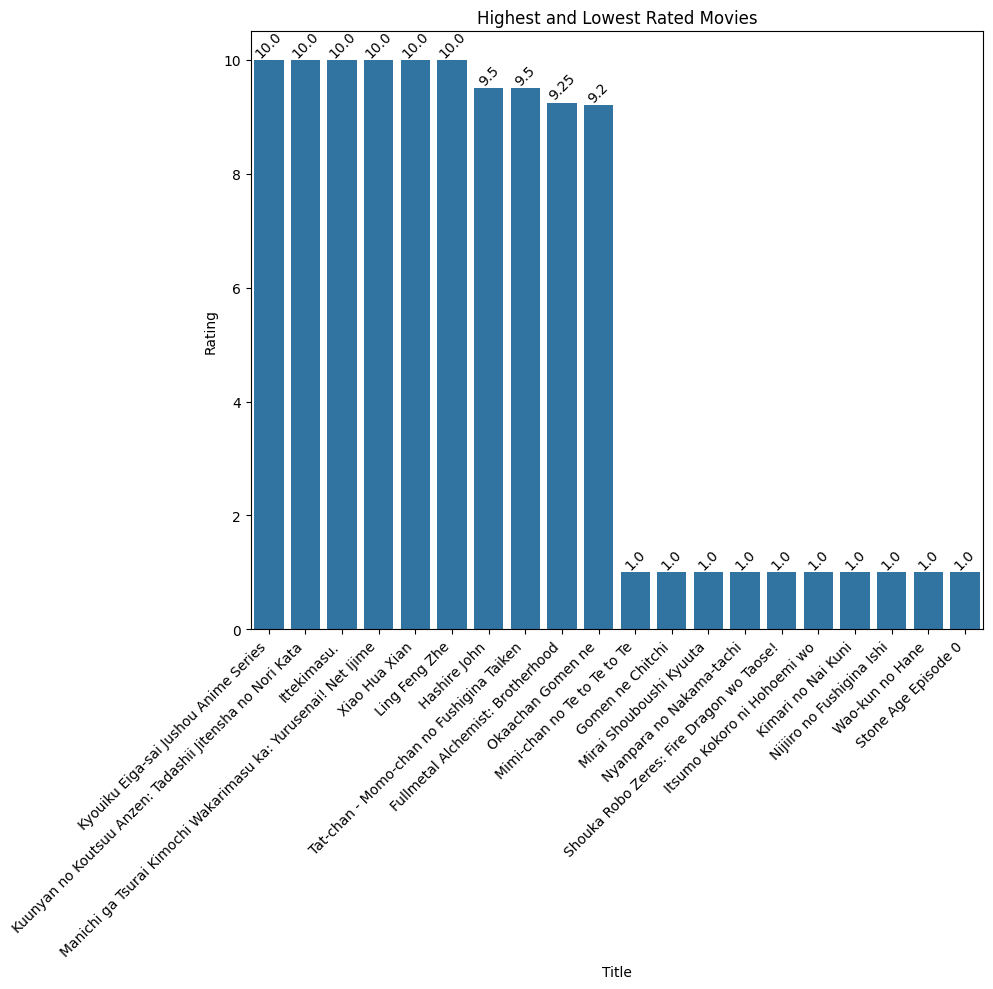

In [ ]:
# plot highest rated and lowest rated movies
plt.figure(figsize=(10, 10))
sns.barplot(x='Title', y='Rating', data=pd.concat([highly_rated_movies, least_rated_movies]))
plt.xticks(rotation=45, ha='right')

# add rating values as text labels at a 45-degree angle
for i, v in enumerate(pd.concat([highly_rated_movies, least_rated_movies])['Rating']):
  plt.text(i, v, str(v), ha='center', va='bottom', rotation=45)

plt.title('Highest and Lowest Rated Movies')
plt.tight_layout()
plt.show()


In [ ]:
 # split genres and explode the DataFrame for average rating calculation
genre_exploded = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')

# group by genre and calculate average rating
avg_rating_by_genre = genre_exploded.groupby('Genre')['Rating'].mean().reset_index()
avg_rating_by_genre = avg_rating_by_genre.nlargest(10, 'Rating')

print("\nTop 10 Genres by Average Rating:\n", avg_rating_by_genre)


Top 10 Genres by Average Rating:
                 Genre    Rating
158       ['Thriller'  9.140000
111          ['Josei'  7.619289
118  ['Martial Arts']  7.550000
125        ['Mystery'  7.160391
46    'Psychological'  7.102405
26            'Josei'  7.099561
76         'Thriller'  7.088859
78          'Vampire'  7.049474
27           'Josei']  7.048728
44           'Police'  7.041747


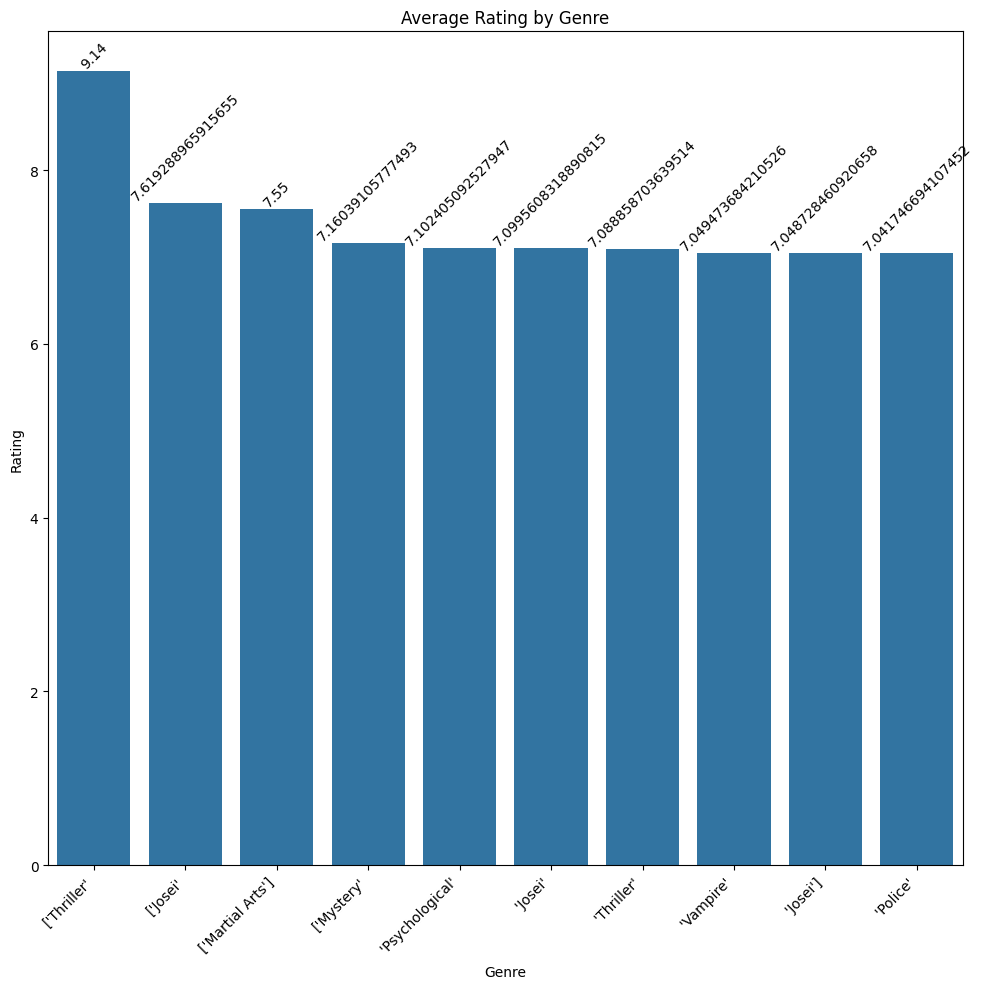

In [ ]:
# plot average rating by genre
plt.figure(figsize=(10, 10))
sns.barplot(x='Genre', y='Rating', data=avg_rating_by_genre)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(avg_rating_by_genre['Rating']):
  plt.text(i, v, str(v), ha='center', va='bottom', rotation=45)

plt.title('Average Rating by Genre')
plt.tight_layout()
plt.show()

**Content-based Filtering**

In [ ]:
# covert ',', [, ] in genre, producer and studio to ''
def to_string(x):
    if x:
        return str(x).replace(',',' ').replace('[','').replace(']','').replace("'",'')
    else:
        return ''

df['Genre'] = df['Genre'].map(lambda x: to_string(x))
df['Producer'] = df['Producer'].map(lambda x: to_string(x))
df['Studio'] = df['Studio'].map(lambda x: to_string(x))

**Using Count Vectorizer and Cosine Similarity**

In [ ]:
def preprocess_feature(feature):

    # convert feature to string if it's not already
    feature = str(feature)

    # replace NaN-like values with empty strings for proper processing
    feature = 'unknown' if feature in ['NaN', 'nan', 'none', 'unknown'] else feature

    # remove punctuation, digits, and extra spaces
    feature = re.sub(r'[^\w\s]', '', feature)
    feature = re.sub(r'\d+', '', feature)
    feature = re.sub(r'\s+', ' ', feature).strip()


    # tokenize and remove stopwords
    tokens = feature.split()
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    filtered_tokens = ' '.join(filtered_tokens)
    return filtered_tokens

In [ ]:
def preprocess_title(title):
  return ''.join(title).lower()

In [ ]:
df['Genre'] = df['Genre'].apply(preprocess_feature)
df['Producer'] = df['Producer'].apply(preprocess_feature)
df['Studio'] = df['Studio'].apply(preprocess_feature)
df['Synopsis'] = df['Synopsis'].apply(preprocess_feature)
df['Title'] = df['Title'].apply(preprocess_title)
df['Type'] = df['Type'].apply(preprocess_feature)
df['Source'] = df['Source'].apply(preprocess_feature)

In [ ]:
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [ ]:
df['soup'] = df['Genre'] + ' ' + df['Producer'] + ' ' + df['Studio'] + ' ' + df['Synopsis'] + ' ' + df['Type']  + ' ' + df['Source']

In [ ]:
df['soup'] = df['Genre'] + ' ' + df['Producer'] + ' ' + df['Studio'] + ' ' + df['Synopsis'] + ' ' + df['Title'] + ' ' + df['Type']  + ' ' + df['Source']

In [ ]:
df['soup'].fillna('unknown', inplace=True)
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    anime_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]

    # create a DataFrame to display recommendations and scores
    recommendations = pd.DataFrame({
        'Title': df['Title'].iloc[anime_indices],
        'Similarity Score': scores
    })

    return recommendations

In [ ]:
recommended_animes = get_recommendations('one piece', cosine_sim, top_n = 10)
print(recommended_animes)

                                                   Title  Similarity Score
12365  one piece: episode of east blue - luffy to 4-n...          0.337164
3248                        one piece film: strong world          0.304241
4926              one piece film: strong world episode 0          0.298604
3692                       one piece: romance dawn story          0.278276
6186   one piece: episode of nami - koukaishi no nami...          0.261628
1005   one piece: oounabara ni hirake! dekkai dekkai ...          0.253870
9695   one piece: episode of sabo - 3 kyoudai no kizu...          0.247012
10019                 one piece: adventure of nebulandia          0.246403
5482   digimon xros wars: aku no death general to nan...          0.244047
400        one piece movie 2: nejimaki-jima no daibouken          0.239641


**Word2Vec**

In [ ]:
def updated_preprocess_feature(feature):

    # convert feature to string if it's not already
    feature = str(feature)

    # replace NaN-like values with empty strings for proper processing
    feature = 'unknown' if feature in ['NaN', 'nan', 'none', 'unknown'] else feature

    # remove punctuation, digits, and extra spaces
    feature = re.sub(r'[^\w\s]', '', feature)
    feature = re.sub(r'\d+', '', feature)
    feature = re.sub(r'\s+', ' ', feature).strip()

    # # Convert to lowercase
    # feature = feature.lower()

    # tokenize and remove stopwords
    tokens = feature.split()
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return filtered_tokens

In [ ]:
def updated_preprocess_title(title):
  return [''.join(title).lower()]

In [ ]:
df['Genre'] = df['Genre'].apply(updated_preprocess_feature)
df['Producer'] = df['Producer'].apply(updated_preprocess_feature)
df['Studio'] = df['Studio'].apply(updated_preprocess_feature)
df['Synopsis'] = df['Synopsis'].apply(updated_preprocess_feature)
df['Title'] = df['Title'].apply(updated_preprocess_title)
df['Type'] = df['Type'].apply(updated_preprocess_feature)
df['Source'] = df['Source'].apply(updated_preprocess_feature)

In [ ]:
df['combined'] = df['Genre'] + df['Producer'] + df['Studio'] + df['Synopsis'] + df['Type'] + df['Source']

In [ ]:
df['combined'] = df['Genre'] + df['Producer'] + df['Studio'] + df['Synopsis'] + df['Title'] + df['Type'] + df['Source']

In [ ]:
w2v = Word2Vec(sentences=df['combined'], vector_size=100, window=5, min_count=1, workers=4)
print(w2v.wv.key_to_index)

{'unknown': 0, 'The': 1, 'TV': 2, 'Source': 3, 'Comedy': 4, 'OVA': 5, 'Unknown': 6, 'Music': 7, 'Original': 8, 'Action': 9, 'A': 10, 'Manga': 11, 'Movie': 12, 'Fantasy': 13, 'world': 14, 'Adventure': 15, 'Special': 16, 'school': 17, 'Drama': 18, 'one': 19, 'Kids': 20, 'new': 21, 'SciFi': 22, 'ANN': 23, 'life': 24, 'MAL': 25, 'In': 26, 'girl': 27, 'Shounen': 28, 'story': 29, 'series': 30, 'School': 31, 'Life': 32, 'Animation': 33, 'Written': 34, 'Rewrite': 35, 'Romance': 36, 'Studio': 37, 'Slice': 38, 'day': 39, 'novel': 40, 'ONA': 41, 'However': 42, 'time': 43, 'two': 44, 'friends': 45, 'young': 46, 'video': 47, 'first': 48, 'But': 49, 'Supernatural': 50, 'Tokyo': 51, 'Magic': 52, 'Visual': 53, 'manga': 54, 'Hentai': 55, 'find': 56, 'named': 57, 'anime': 58, 'He': 59, 'years': 60, 'This': 61, 'also': 62, 'Japan': 63, 'mysterious': 64, 'Entertainment': 65, 'Game': 66, 'must': 67, 'become': 68, 'girls': 69, 'Production': 70, 'boy': 71, 'love': 72, 'Historical': 73, 'It': 74, 'AniDB': 75,

In [ ]:
def get_recommendations(movie_title, top_n=5):

    tokenized_title = preprocess_feature(movie_title)

    valid_words = [word for word in tokenized_title if word in w2v.wv]

    # if no valid words found in the model, return an empty list
    if not valid_words:
        return []

    # calculate the average vector for the provided title
    title_vector = sum([w2v.wv[word] for word in valid_words]) / len(valid_words)


    similar_animes = []

    for i, features in enumerate(df['combined']):

        # calculate the average vector for each movie's combined features
        anime_vector = sum([w2v.wv[word] for word in features if word in w2v.wv]) / len(features)

        # convert NumPy arrays to lists of (index, value) pairs for cossim
        title_vector_list = list(enumerate(title_vector))
        anime_vector_list = list(enumerate(anime_vector))

        # compute cosine similarity between the two vectors
        similarity_score = gensim.matutils.cossim(title_vector_list, anime_vector_list)

        # append the anime title and similarity score
        similar_animes.append((df['Title'].iloc[i], similarity_score))

    # sort the list by similarity score and return the top_n similar animes
    similar_animes = sorted(similar_animes, key=lambda x: x[1], reverse=True)

    return similar_animes[:top_n]

In [ ]:
recommended_animes = get_recommendations('Trinity Blood', top_n=10)
for title, score in recommended_animes:
    print(f"Title: {title}, Similarity Score: {score}")

Title: ['code:realize - sousei no himegimi'], Similarity Score: 0.9788595757299623
Title: ['aho girl'], Similarity Score: 0.9772121056811286
Title: ['saraiya goyou'], Similarity Score: 0.9766797980410805
Title: ['kantai collection: kancolle'], Similarity Score: 0.9765761978477953
Title: ["knight's & magic"], Similarity Score: 0.9761773796761964
Title: ['boku no hero academia 2nd season'], Similarity Score: 0.9755618820393761
Title: ['ginga eiyuu densetsu: arata naru tatakai no overture'], Similarity Score: 0.9754842620481311
Title: ["queen's blade: rebellion"], Similarity Score: 0.9753610592592196
Title: ['ufo princess valkyrie'], Similarity Score: 0.9752745874029085
Title: ['bungou stray dogs'], Similarity Score: 0.9750668028756745
